In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Mall customers data
This project shows how to perform a mall customers segmentation using Machine Learning algorithms. This is the unsupervised clustering problem and three popular algorithms will be presented and compared: KMeans, Hierarchical clustering and DBSCAN clustering.

This dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score.

#### Problem Statement:
You own the mall and want to understand the customers like who can be easily converge (Target customers) so that the sense can be given to marketing team and plan the strategy accordingly.

#### Final Goal:
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.

### Data Description
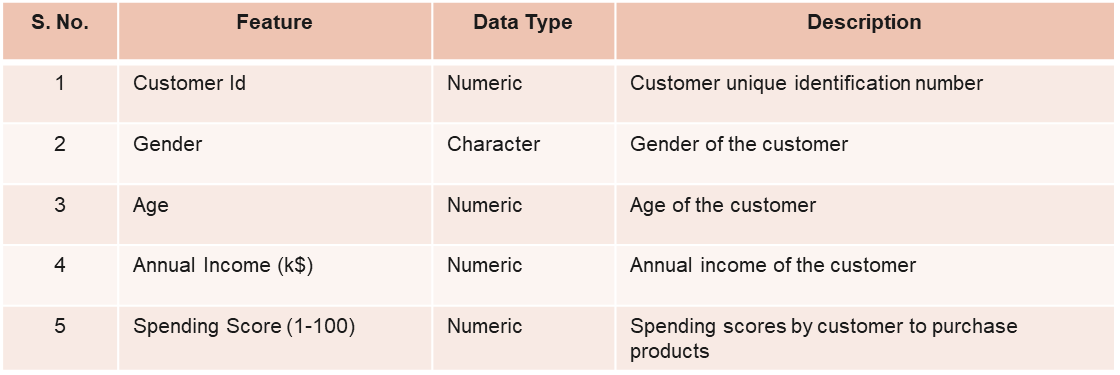

In [ ]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd

#FOR VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

#LIBRARY FOR SPLITTING THE DATA
from sklearn.model_selection import train_test_split

#FOR REMOVING THE WARNINGS
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#READING THE DATASET
cust_df_main=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/DATA/DS3_C6_S3_MallCustomers_Data_Project.csv')
cust_df_main

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


EXPLORATORY DATA ANALYST

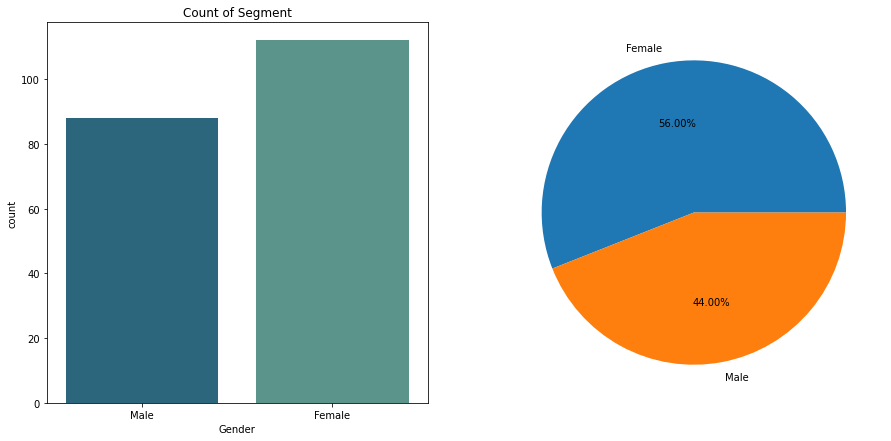

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Segment") 
percentage = cust_df_main["Gender"].value_counts()
labels = list(cust_df_main["Gender"].value_counts().index)

sns.countplot(x=cust_df_main["Gender"],ax=ax[0],palette = 'crest_r')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

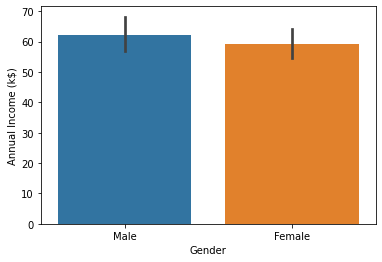

<Figure size 720x864 with 0 Axes>

In [ ]:
sns.barplot(x = 'Gender',
            y = 'Annual Income (k$)',
            data = cust_df_main)
 
# Show the plot
plt.figure(figsize=(10, 12))
plt.show()

In [ ]:
#DESCRIBING THE STATISTICAL PARAMETERS FOR EACH FEATURE
cust_df_main.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


LOOKING FOR THE MAXIMUM AND MINIMUM VALUES IN THE DATA, WE CAN SEE THAT THE RANGE OF ALL FEATURES ARE ALMOST SAME. HENCE, WE CAN SKIP THE SCALLING PROCESS FOR THIS DATASET.

In [ ]:
#CHECKING THE NULL VALUES IN THE DATASET
cust_df_main.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#CHECK SPECIAL CHARACTER IN DATASET 
cust_df_main = cust_df_main.replace(to_replace = "@_!#$%^&*()<>?/\|}{~:?", value = np.nan)     
cust_df_main.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#CHECKING THE DATA TYPES OF THE GIVEN DATA FRAME
cust_df_main.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

THE FEATURE 'CUSTOMER ID' DOSN'T SEEM TO BE RELEVANT SO WE'RE DROPPING THAT COLUMNS.

In [ ]:
#CREATING NEW DATAFRAME WHICH INCUDES FEATURES FROM AGE
cust_df_2 = cust_df_main.iloc[:, 2:]

#MODEL 1

K-MEANS CLUSTERING

In [ ]:
#REQUIRED LIBRARIES FOR K-MEAN CLUSTERING MODEL
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


Finding the optimum value of K using Elbow Method

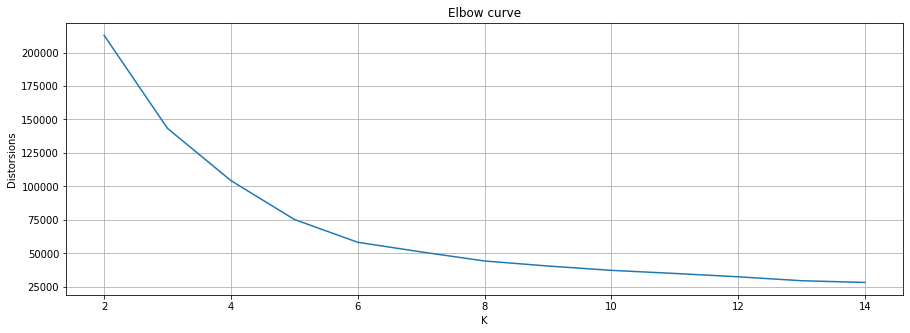

In [ ]:
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cust_df_2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

by elbow method- getting k as 5.

CROSS CHECKING THE K VALUE USING SILHOUETTE


For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.4398198217929885
For n_clusters = 8 The average silhouette_score is : 0.4307991110543737
For n_clusters = 9 The average silhouette_score is : 0.4139726023986123


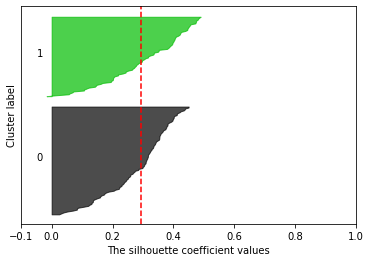

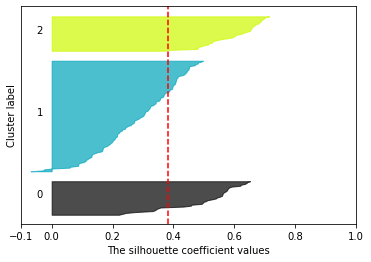

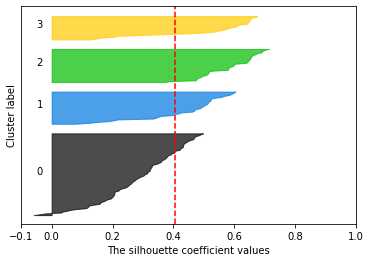

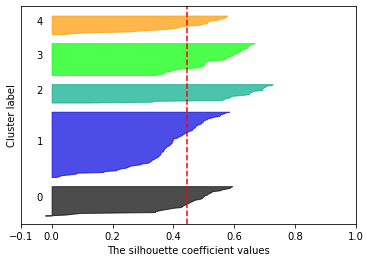

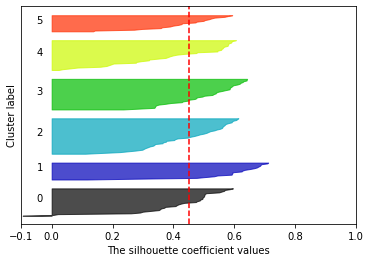

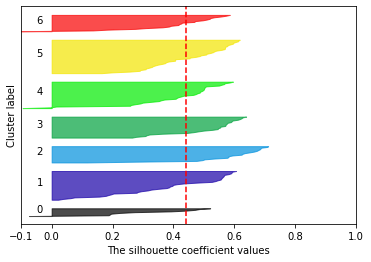

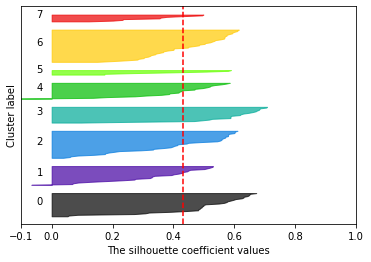

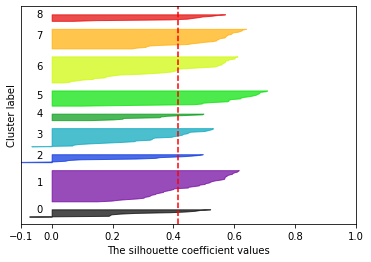

In [ ]:
range_n_clusters = np.arange(start=2, stop=10, step=1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(cust_df_2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=50)
    cluster_labels = clusterer.fit_predict(cust_df_2)

    silhouette_avg = silhouette_score(cust_df_2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cust_df_2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

EVEN BY CROSS CHECKING WITH THE SHILLOUTE SCORE, WE THE K-VALUE AS 5 FOR SHILLOUTE SCORE **0.44** .

USING OPTIMAL VALUE OF K I.E 5 FOR MODEL BUILDING

In [ ]:
#CREATING THE CLUSTERS VALUES FOR PLOTTING
Kmeans_model_5 = KMeans(n_clusters=5 )
Kmeans_model_5.fit(cust_df_2)

cluster_centroid_5 = Kmeans_model_5.cluster_centers_
cluster_centroid_5

labels_5 = Kmeans_model_5.labels_
labels_5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
#CREATING NEW DATAFRAME OF CLUSTER VLAUES 
df2 = pd.DataFrame(labels_5, columns = ['cluster_5'])
df2

,cluster_5
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,1
197,2
198,1


In [ ]:
#CONCATINATING THE VALUES OF THE CLUSTER AND SCALED DATAFRAME TO NEW DF.
cust_df_cl = pd.concat([df2, cust_df_2], axis=1)
cust_df_cl

,cluster_5,Age,Annual Income (k$),Spending Score (1-100)
0,4,19,15,39
1,3,21,15,81
2,4,20,16,6
3,3,23,16,77
4,4,31,17,40
...,...,...,...,...
195,2,35,120,79
196,1,45,126,28
197,2,32,126,74
198,1,32,137,18


In [ ]:
#PRINTING THE UNIQUE VALUES OF EACH FEATURES BELONGING TO CLUSTERS
for col in cust_df_cl.columns:
  print("\n")
  print(col)
  for c in cust_df_cl.cluster_5.unique():
    print(c)
    print(cust_df_cl[cust_df_cl["cluster_5"] == c][col].unique())



cluster_5
4
[4]
3
[3]
0
[0]
2
[2]
1
[1]


Age
4
[19 20 31 35 64 67 58 37 52 46 54 45 40 60 53 49 42 36 65 48]
3
[21 23 22 30 35 24 20 25 31 29 18]
0
[31 50 27 29 49 33 59 47 51 69 53 70 19 67 54 63 18 43 68 32 60 26 45 40
 23 57 38 46 21 48 55 22 34 24 20 66 65]
2
[39 31 40 38 29 32 35 28 34 27 30 36 33]
1
[23 59 47 25 20 44 19 57 28 48 34 43 37 56 50 42 36 40 52 58 46 41 54 33
 45 32]


Annual Income (k$)
4
[15 16 17 18 19 20 21 23 24 25 28 29 30 33 34 37 38 39]
3
[15 16 17 18 19 20 21 23 24 25 28 29 30 33 34 37 38 39]
0
[39 40 42 43 44 46 47 48 49 50 54 57 58 59 60 61 62 63 64 65 67 69 71]
2
[ 69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88  93  97
  98  99 101 103 113 120 126 137]
1
[ 70  71  72  73  74  75  76  77  78  79  81  85  86  87  88  93  97  98
  99 101 103 113 120 126 137]


Spending Score (1-100)
4
[39  6 40  3 14 15 13 35 29  5 32 31  4 17 26 36 28]
3
[81 77 76 94 72 99 79 66 98 73 82 61 87 92 75 65]
0
[61 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53

In [ ]:
cust_df_cl.iloc[:,[2,-1]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


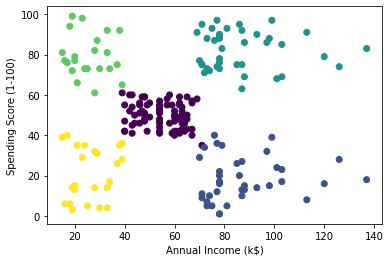

In [ ]:
#PLOTTING THE SCATTER PLOT FOR BELOW FEATURES
plt.scatter(
    x=cust_df_cl["Annual Income (k$)"],
    y=cust_df_cl["Spending Score (1-100)"],
    c=cust_df_cl['cluster_5'],
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

AS WE CAN SEE THE CLUSTERING OF THE PARTICULAR FEATURE I.E. AGE VS SPENDING ARE REPRESENTING IN GOOD WAY. BUT FOR OTHER FEATURES THE CLUSTERS ARE NOT PROPERLY FORMED.

#MODEL 2
HERARCHICAL CLUSTERING

In [ ]:
#REQUIRED LIBRARY FOR HIRARCHICAL CLUSTERING MODEL
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#REQUIRED DATAFRAME
cust_df_2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
#PLOTTING FOR ANNUAL INCOME AND SPENDING SCORE
X1 = cust_df_2.iloc[:,[1,2]].values

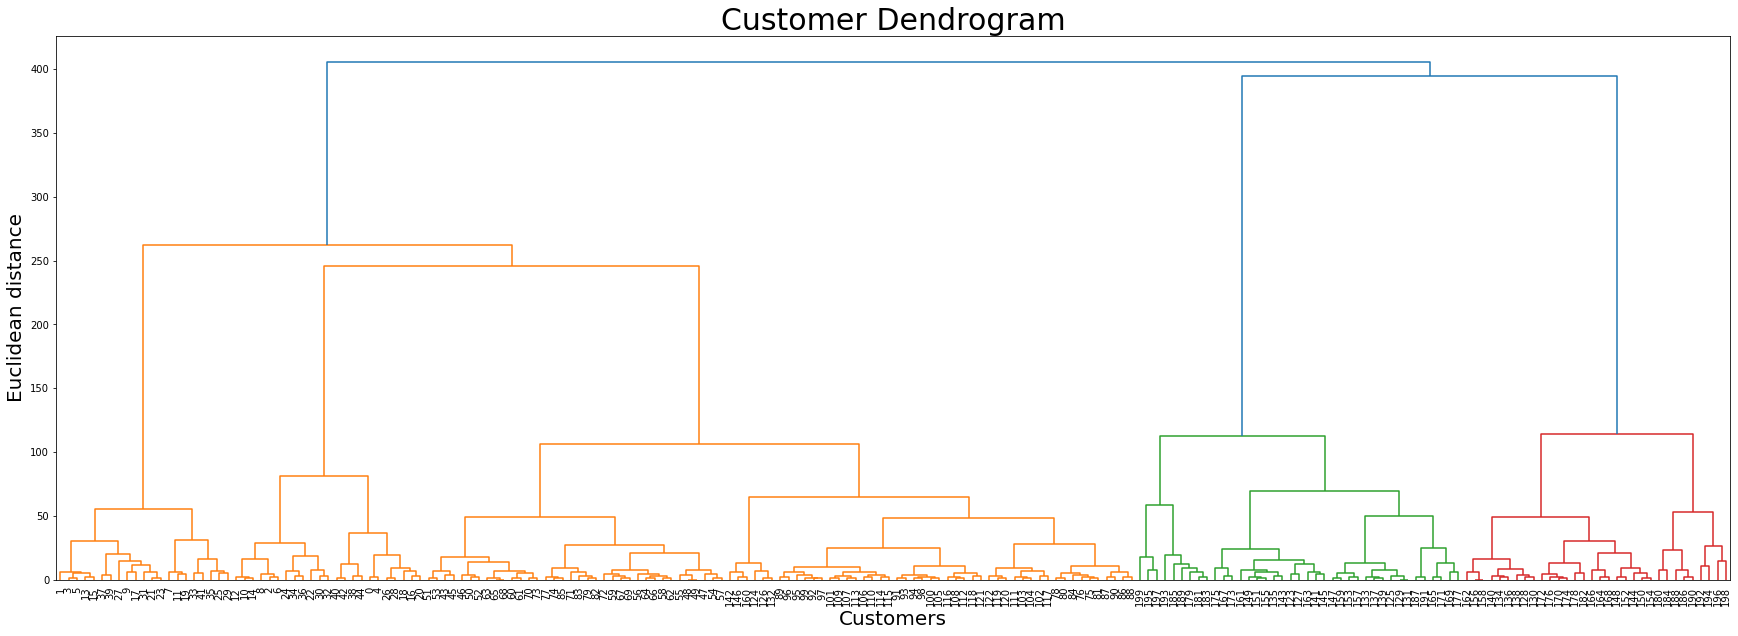

In [ ]:
#plotting of dendogram
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X1, method = 'ward'),labels=cust_df_2.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. 
The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 250 and cut the dendrogram:

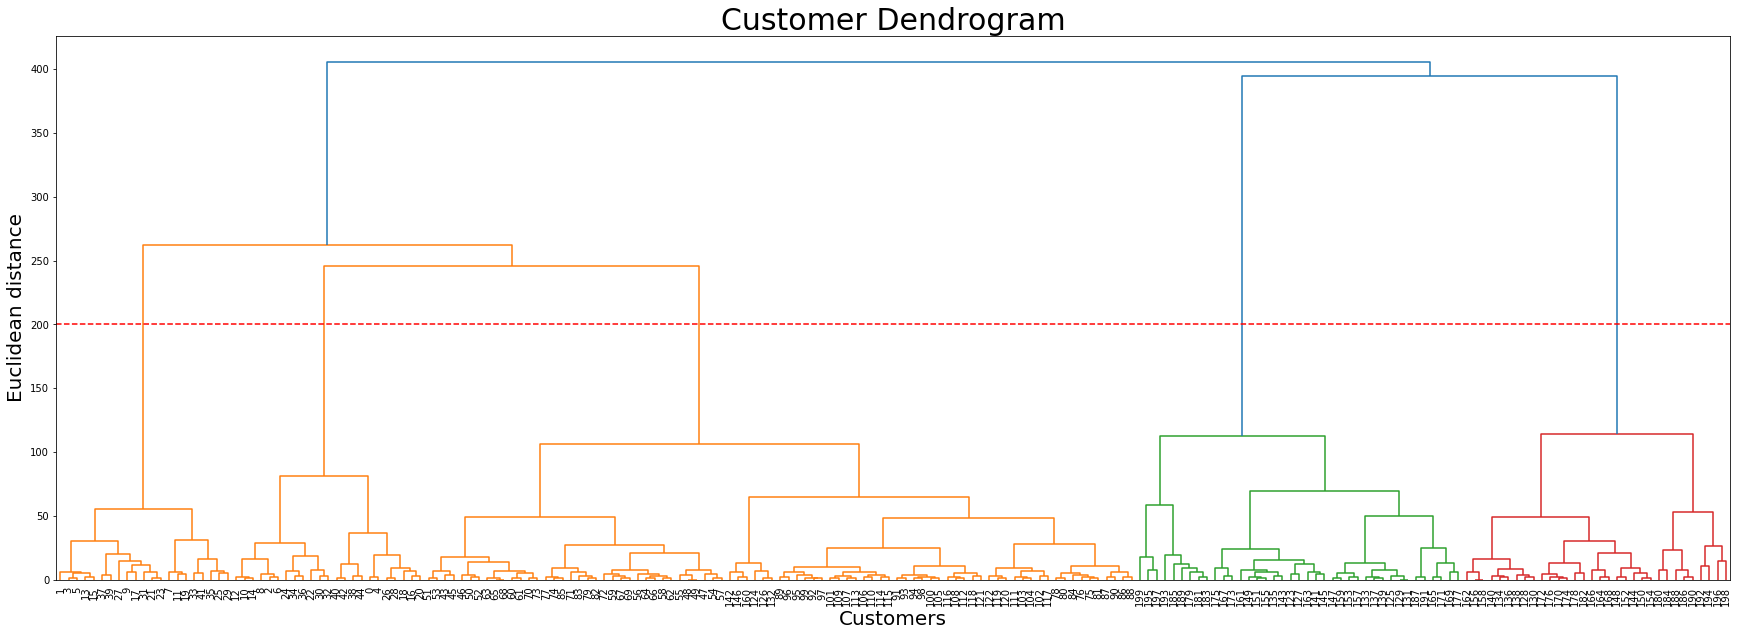

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X1, method = 'ward'),labels=cust_df_2.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In our case, it's 5. So let's fit the Agglomerative model with 5 clusters.

 MODEL BUILDING

In [ ]:
#IMPLEMENTING AND FITTING THE HEIRARCHICAL CLUSTERING MODEL
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)



A cluster of customers based on their annual income and spending score.


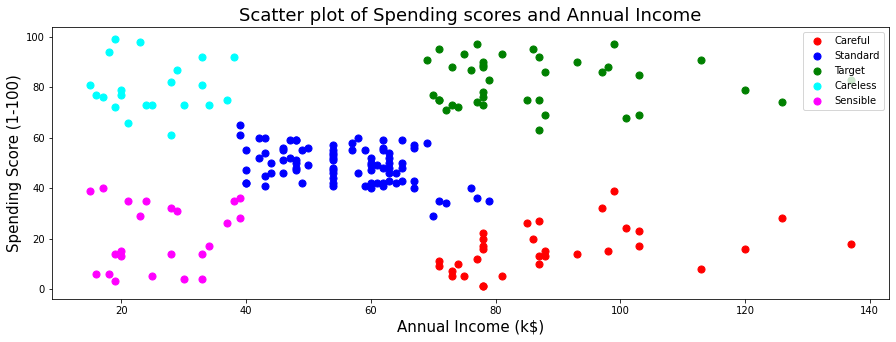

In [ ]:
#CLUSTER VISUALIZATION
plt.figure(figsize=(15,5))
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X1[y_hc == 4, 0], X1[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)',fontsize = 15)
plt.ylabel('Spending Score (1-100)',fontsize = 15)
plt.title('Scatter plot of Spending scores and Annual Income', fontsize = 18)
plt.legend(loc="upper right")
plt.show()

CONCLUSION-

BY VIEWING THE CLUSTER FORMATION USING HEIRARCHICAL CLUSTERING TECHNIQUE, WE CAN SEE THAT THE CLUSTER'S ARE PROPERLY FORMED.


# MODEL-3
DB-SCAN

In [ ]:
from sklearn import metrics
from sklearn.datasets import make_circles

In [ ]:
X3 = cust_df_2.iloc[:,[1,2]]
X3

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X3)

DBSCAN()

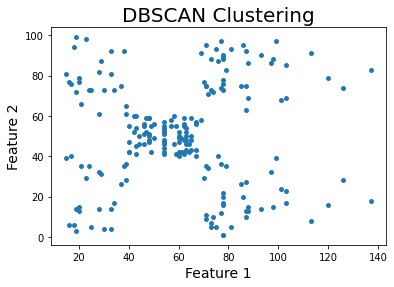

In [ ]:
X3['DBSCAN_labels']=dbscan.labels_ 
X3['DBSCAN_labels'].value_counts()

# Plotting resulting clusters
#plt.figure(figsize=(10,10))
plt.scatter(X3.iloc[:, [0]], X3.iloc[:, [1]],cmap='viridis',s=15)
#plt.scatter(X3[0],X3[1],c=X3['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### Evaluate the optimum values of Hyperparameters"

In [ ]:
#Finding optimum values of hyperparameters
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X3)
distances, indices = nbrs.kneighbors(X3)

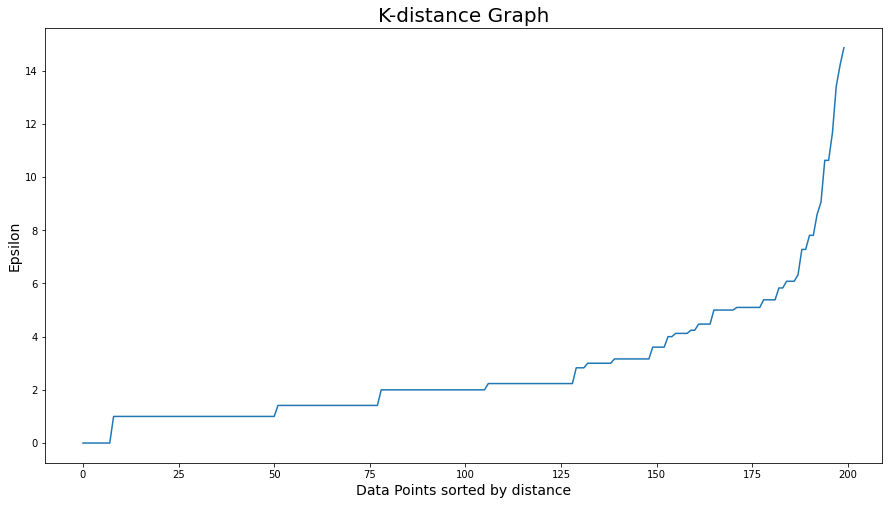

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.35, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X3)
distances, indices = nbrs.kneighbors(X3)

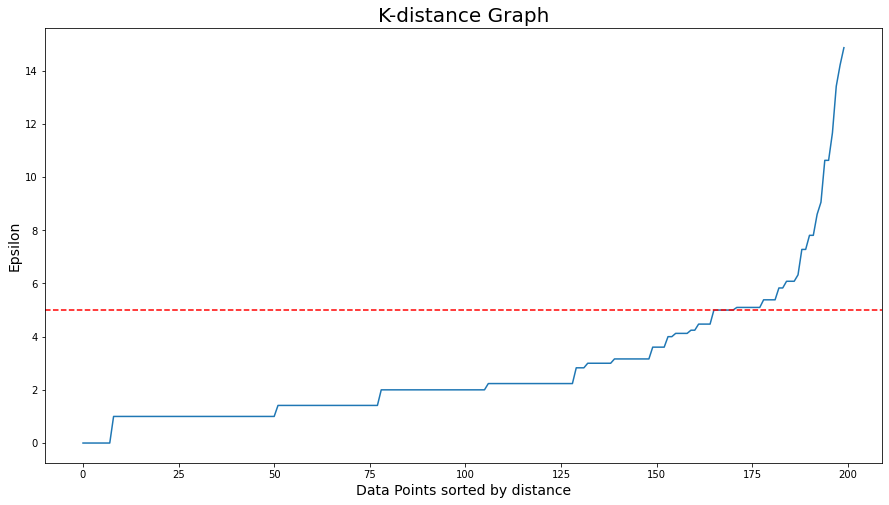

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Considering the epsilon value as 5.

In [ ]:
eps=5
for min_samples in [10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X3)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 5 | min_samples=  10 | obtained clustering:  [(1, 133), (2, 67)]
eps= 5 | min_samples=  11 | obtained clustering:  [(1, 136), (2, 64)]
eps= 5 | min_samples=  12 | obtained clustering:  [(1, 140), (2, 29), (3, 31)]
eps= 5 | min_samples=  13 | obtained clustering:  [(1, 149), (2, 20), (3, 31)]


In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=5,min_samples=12)
dbscan_opt.fit(X3)

DBSCAN(eps=5, min_samples=12)

In [ ]:
X3['DBSCAN_opt_labels']=dbscan_opt.labels_
X3['DBSCAN_opt_labels'].value_counts()

-1    140
 1     31
 0     29
Name: DBSCAN_opt_labels, dtype: int64

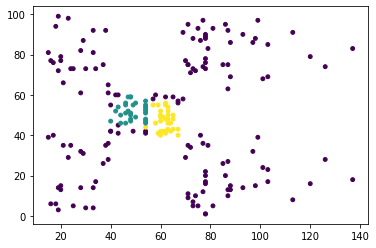

In [ ]:
plt.scatter(X3['Annual Income (k$)'], X3['Spending Score (1-100)'], c=X3['DBSCAN_opt_labels'],cmap='viridis',s=15)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X['DBSCAN_opt_labels']))3

 **INTERPRETATION** -

BY VIEWING THE CLUSTER FORMATION USING DB SCAN TECHNIQUE, WE CAN SEE THAT THE CLUSTER'S ARE NOT PROPERLY FORMED. AS IT'S CONSIDERING THE HIGH NOISE IN THE DATA.

### **CONCLUSION -**
## CONSIDERING ALL THE MODEL VISUAL REPRESENTAION OF CLUSTER, WE CAN SEE THAT THE CLUSTERS OF THE K-MEANS MODEL AND HEIRRARCHICAL CLUSTERING ARE FORMED IN QUITE GOOD WAY.